In [202]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [133]:
data=pd.read_csv('SKcleaned.csv')
data.head()

,Date,Weekday,Time,category,push length,total_noti_push_cnt,total_sess_cnt,open_rate
0,2022-11-01,Tuesday,08:00,weather,29,33354,280,0.84%
1,2022-11-01,Tuesday,11:10,family,44,33375,94,0.28%
2,2022-11-01,Tuesday,13:00,health,30,33392,304,0.91%
3,2022-11-01,Tuesday,18:00,baby,33,33428,89,0.27%
4,2022-11-01,Tuesday,21:00,family,29,33442,246,0.74%


### feature engineer: create frequency and length variable

In [134]:
data['Date'] = pd.to_datetime(data['Date'])

# group the data by the date column
groupbydate = data.groupby(by=data['Date'].dt.date).agg({'count'})['Date']
groupbydate.head()

,count
Date,
2022-11-01,6
2022-11-02,6
2022-11-03,6
2022-11-04,6
2022-11-05,7


In [137]:
# data=data.set_index('Date')
groupbydate.index=groupbydate.index.astype('datetime64[ns]')
data=data.join(groupbydate,on='Date')

In [140]:
data=data.rename(columns = {'count':'frequency'})
data.head()

,Date,Weekday,Time,category,push length,total_noti_push_cnt,total_sess_cnt,open_rate,frequency
0,2022-11-01,Tuesday,08:00,weather,29,33354,280,0.84%,6
1,2022-11-01,Tuesday,11:10,family,44,33375,94,0.28%,6
2,2022-11-01,Tuesday,13:00,health,30,33392,304,0.91%,6
3,2022-11-01,Tuesday,18:00,baby,33,33428,89,0.27%,6
4,2022-11-01,Tuesday,21:00,family,29,33442,246,0.74%,6


In [99]:
data['category'].unique()

array(['weather', 'family', 'health', 'baby', 'entertainment', 'shopping',
       'edu', 'travel', 'cusine', 'other'], dtype=object)

In [100]:
data['Weekday'].unique()

array(['Tuesday ', 'Wednesday ', 'Thursday ', 'Friday ', 'Saturday ',
       'Sunday ', 'Monday '], dtype=object)

In [101]:
data['Time'].unique()

array(['08:00', '11:10', '13:00', '18:00', '21:00', '23:30', '11:00',
       '22:00', '23:00', '16:00', '09:00', '19:31'], dtype=object)

### one hot encode categorical variables: weekday, time, category

In [154]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()
feature_arr=ohe.fit_transform(data[['Weekday','Time','category']]).toarray()

feature_label=ohe.categories_
arr_str0 = list(map(lambda x: str(x), feature_label[0]))
arr_str1 = list(map(lambda x: str(x), feature_label[1]))
arr_str2 = list(map(lambda x: str(x), feature_label[2]))
feature_label=np.concatenate((arr_str0,arr_str1,arr_str2))


onehot_data=pd.DataFrame(feature_arr,columns=feature_label)
onehot_data.shape
onehot_data.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,08:00,09:00,11:00,...,baby,cusine,edu,entertainment,family,health,other,shopping,travel,weather
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [156]:
X=pd.concat([data[['push length','frequency']],onehot_data],axis=1)
X.head()

,push length,frequency,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,08:00,...,baby,cusine,edu,entertainment,family,health,other,shopping,travel,weather
0,29,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,30,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,33,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [165]:
Y=data.iloc[:,7].str.strip('%').astype(float)
Y.head() #percentage

0    0.84
1    0.28
2    0.91
3    0.27
4    0.74
Name: open_rate, dtype: float64

### use decision tree regression to identify important features

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [176]:
from sklearn.tree import DecisionTreeRegressor

# Train the model on the training data
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = regressor.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

regressor.feature_importances_

Test accuracy: 0.10


array([0.08088633, 0.21460831, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00944224, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.20231416, 0.        , 0.        , 0.13096718, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.36178178])

In [186]:
regressor.feature_importances_[[0,1,20,23,30]]

array([0.08088633, 0.21460831, 0.20231416, 0.13096718, 0.36178178])

In [184]:
X.columns[[0,1,20,23,30]]

Index(['push length', 'frequency', '23:30', 'edu', 'weather'], dtype='object')

In [187]:
from sklearn.tree import plot_tree

[Text(334.8, 380.52, 'X[30] <= 0.5\nmse = 0.028\nsamples = 188\nvalue = 0.387'),
 Text(167.4, 271.8, 'X[1] <= 9.5\nmse = 0.027\nsamples = 175\nvalue = 0.374'),
 Text(83.7, 163.07999999999998, 'X[20] <= 0.5\nmse = 0.026\nsamples = 144\nvalue = 0.391'),
 Text(41.85, 54.360000000000014, 'mse = 0.021\nsamples = 123\nvalue = 0.375'),
 Text(125.55000000000001, 54.360000000000014, 'mse = 0.044\nsamples = 21\nvalue = 0.49'),
 Text(251.10000000000002, 163.07999999999998, 'X[23] <= 0.5\nmse = 0.026\nsamples = 31\nvalue = 0.295'),
 Text(209.25, 54.360000000000014, 'mse = 0.019\nsamples = 29\nvalue = 0.276'),
 Text(292.95, 54.360000000000014, 'mse = 0.051\nsamples = 2\nvalue = 0.565'),
 Text(502.20000000000005, 271.8, 'X[0] <= 30.5\nmse = 0.012\nsamples = 13\nvalue = 0.563'),
 Text(418.5, 163.07999999999998, 'X[8] <= 0.5\nmse = 0.006\nsamples = 2\nvalue = 0.765'),
 Text(376.65000000000003, 54.360000000000014, 'mse = 0.0\nsamples = 1\nvalue = 0.84'),
 Text(460.35, 54.360000000000014, 'mse = 0.0\nsa

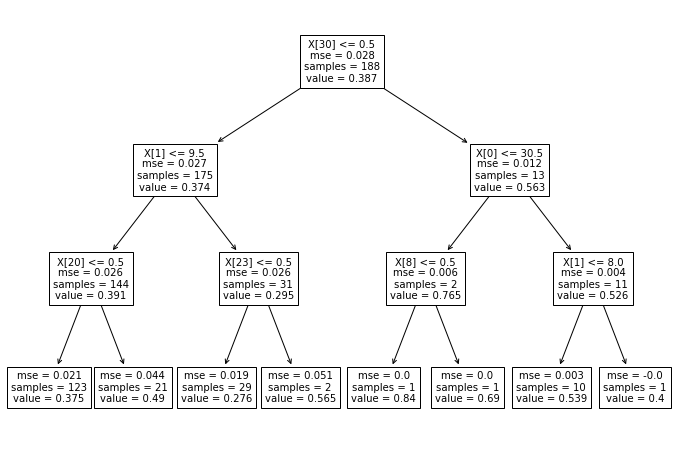

In [190]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(regressor, ax=ax)

result: topic, frequency, time, push length are key factors (order by importance)

### average open rate by topic

In [210]:
#average open rate
#by topic
weather=data[data['category']=='weather']
family=data[data['category']=='family']
health=data[data['category']=='health']
baby=data[data['category']=='baby']
shopping =data[data['category']=='shopping']
entertainment=data[data['category']=='entertainment']
travel=data[data['category']=='travel']
edu=data[data['category']=='edu']
cusine=data[data['category']=='cusine']

print('average open rate :',data['total_sess_cnt'].sum()/data['total_noti_push_cnt'].sum()*100)
print('average open rate for weather:',weather['total_sess_cnt'].sum()/weather['total_noti_push_cnt'].sum()*100)
print('average open rate for family:', family['total_sess_cnt'].sum()/family['total_noti_push_cnt'].sum()*100)
print('average open rate for health:',health['total_sess_cnt'].sum()/health['total_noti_push_cnt'].sum()*100)
print('average open rate for baby:', baby['total_sess_cnt'].sum()/baby['total_noti_push_cnt'].sum()*100)
print('average open rate for shopping:',shopping['total_sess_cnt'].sum()/shopping['total_noti_push_cnt'].sum()*100)
print('average open rate for entertainment:',entertainment['total_sess_cnt'].sum()/entertainment['total_noti_push_cnt'].sum()*100)
print('average open rate for travel:',travel['total_sess_cnt'].sum()/travel['total_noti_push_cnt'].sum()*100)
print('average open rate for edu:',edu['total_sess_cnt'].sum()/edu['total_noti_push_cnt'].sum()*100)
print('average open rate for cuisine:',cusine['total_sess_cnt'].sum()/cusine['total_noti_push_cnt'].sum()*100)

#must include weather and edu(幼儿园、中小学、教育), then by open rate choose health and entertainment 
#only pick four topics above average 


average open rate : 0.38570404907879374
average open rate for weather: 0.5609285851720089
average open rate for family: 0.3677477427202275
average open rate for health: 0.42012739675547534
average open rate for baby: 0.34896262275125256
average open rate for shopping: 0.3009405488874851
average open rate for entertainment: 0.38948221386636167
average open rate for travel: 0.3457700411851826
average open rate for edu: 0.3899319058510722
average open rate for cuisine: 0.3674412596345682


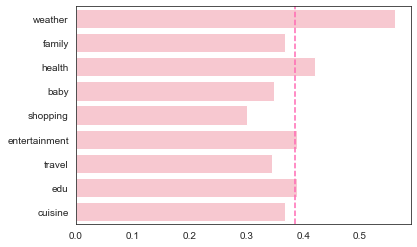

In [251]:
x=['weather', 'family', 'health', 'baby', 'shopping', 'entertainment', 'travel','edu', 'cuisine']
y=[0.5609285851720089,0.3677477427202275,0.42012739675547534,0.34896262275125256,0.3009405488874851,
   0.38948221386636167,0.3457700411851826, 0.3899319058510722,0.3674412596345682]
sns.barplot(y=x,x=y,orient='h', color='pink')
plt.axvline(0.38570404907879374,color='hotpink',linestyle='--')

### average open rate by frequency, find optimal push frequency

In [222]:
#to check lower frequency is better
data['frequency'].unique()

array([ 6,  7,  9, 10], dtype=int64)

In [224]:
low_freq=data[data['frequency']<=7]['open_rate'].str.strip('%').astype(float)
print(low_freq.shape)
print(low_freq.mean())

(88,)
0.44125


In [225]:
high_freq=data[data['frequency']>7]['open_rate'].str.strip('%').astype(float)
print(high_freq.shape)
print(high_freq.mean())

(148,)
0.3537162162162162


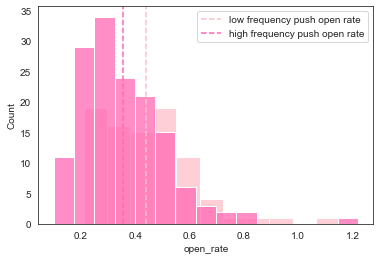

In [237]:
sns.histplot(low_freq,color='pink')
sns.histplot(high_freq,color='hotpink')
plt.axvline(0.44125,color='pink',linestyle='--')
plt.axvline(0.3537162162162162,color='hotpink',linestyle='--')
plt.legend(labels=["low frequency push open rate", "high frequency push open rate"])

In [230]:
from scipy import stats
t, p = stats.ttest_ind(low_freq, high_freq, equal_var=False)
p

0.00011017154209164323

### average open rate by push length, find optimal push length: short title length better

32.940677966101696


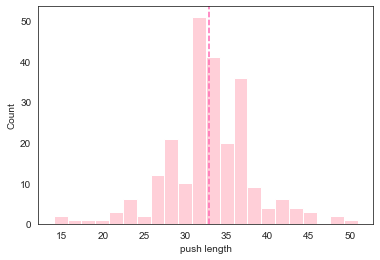

In [236]:
print(X[X.columns[0]].mean() )#avg push length
sns.histplot(X[X.columns[0]],color='pink')
plt.axvline(32.940677966101696,color='hotpink',linestyle='--')

In [215]:
short=data[data['push length']<32.940677966101696]['open_rate'].str.strip('%').astype(float)
short.shape
print(short.mean())

0.41763636363636353


In [216]:
long=data[data['push length']>=32.940677966101696]['open_rate'].str.strip('%').astype(float)
long.shape
print(long.mean())

0.359047619047619


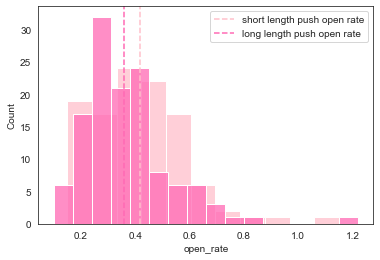

In [238]:
sns.histplot(short,color='pink')
sns.histplot(long,color='hotpink')
plt.axvline(0.41763636363636353,color='pink',linestyle='--')
plt.axvline(0.359047619047619,color='hotpink',linestyle='--')
plt.legend(labels=["short length push open rate", "long length push open rate"])

In [217]:
from scipy import stats
t, p = stats.ttest_ind(long, short, equal_var=False)
p

0.007577512625565662

### find optimal push time for each topic

weather

In [257]:
data[data['category']=='weather'][['Time','open_rate']].head() #weather only 8:00

,Time,open_rate
0,08:00,0.84%
6,08:00,0.69%
12,08:00,0.51%
18,08:00,0.51%
24,08:00,0.53%


In [264]:
print('mean open rate of weather at 8:00 is 0.5609285851720089')

mean open rate of weather at 8:00 is 0.5609285851720089


edu

In [265]:
abt_edu=data[data['category']=='edu'][['Time','open_rate','total_noti_push_cnt','total_sess_cnt']].sort_values('Time')
abt_edu

,Time,open_rate,total_noti_push_cnt,total_sess_cnt
135,11:00,0.25%,34622,87
154,16:00,0.29%,34971,103
15,18:00,0.29%,33291,97
41,18:00,0.27%,34190,94
110,18:00,0.28%,34763,97
137,18:00,0.41%,34657,142
146,18:00,0.80%,34835,279
183,18:00,0.34%,34917,117
221,18:00,0.40%,35583,143
230,18:00,0.79%,35712,282


In [284]:
#abt_edu[abt_edu['Time']=='18:00']['open_rate'].str.strip('%').astype(float).mean()

In [272]:
print('mean open rate of edu at 18:00 is', abt_edu[abt_edu['Time']=='18:00']['total_sess_cnt'].sum()/abt_edu[abt_edu['Time']=='18:00']['total_noti_push_cnt'].sum()*100)

mean open rate of edu at 18:00 is 0.4500841884093427


In [ ]:
#edu(幼儿园、中小学、教育)
#edu avg by time  (excel)
# 11:00	0.25%
# 16:00	0.29%
# 18:00	0.45% √
# 23:00	0.14%


health

In [254]:
time=pd.read_csv('time data.csv')
time.head()

,hour,health sum,entertainment sum
0,0,179,2145
1,1,94,1134
2,2,54,622
3,3,33,419
4,4,36,323


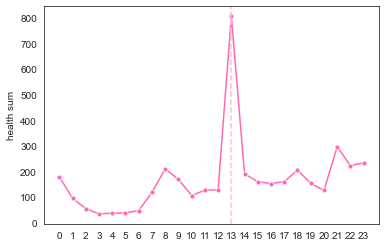

In [314]:
sns.lineplot(x=np.arange(0,24,1),y=time['health sum'],color='hotpink',marker='.',markersize=10)
arr=np.arange(0,24,1)
arr=np.array(list(map(str, arr)))
plt.xticks(ticks=np.arange(0,24,1),labels=arr)
plt.axvline(13,color='pink',linestyle='--')

In [290]:
#health at 13:00

abt_heal=data[(data['category']=='health')&(data['Time']=='13:00')][['Time','open_rate','total_noti_push_cnt','total_sess_cnt']].sort_values('Time')
abt_heal.head()

,Time,open_rate,total_noti_push_cnt,total_sess_cnt
2,13:00,0.91%,33392,304
209,13:00,0.35%,35413,123
201,13:00,0.24%,35263,86
192,13:00,0.38%,35045,133
181,13:00,0.44%,34861,153


In [317]:
#abt_heal[abt_heal['Time']=='13:00']['open_rate'].str.strip('%').astype(float).mean()

0.4203571428571428

In [318]:
print('mean open rate of health at 13:00 is', abt_heal[abt_heal['Time']=='13:00']['total_sess_cnt'].sum()/abt_heal[abt_heal['Time']=='13:00']['total_noti_push_cnt'].sum()*100)

mean open rate of health at 13:00 is 0.4199036174960185


entertainment

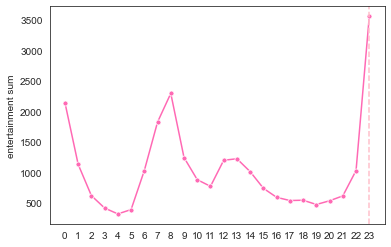

In [320]:
sns.lineplot(x=np.arange(0,24,1),y=time['entertainment sum'],color='hotpink',marker='.',markersize=10)
arr=np.arange(0,24,1)
arr=np.array(list(map(str, arr)))
plt.xticks(ticks=np.arange(0,24,1),labels=arr)
plt.axvline(23,color='pink',linestyle='--')

In [321]:
#entertainment at 23:00

abt_ent=data[(data['category']=='entertainment')&(data['Time']=='23:00')][['Time','open_rate','total_noti_push_cnt','total_sess_cnt']].sort_values('Time')
abt_ent.head()

,Time,open_rate,total_noti_push_cnt,total_sess_cnt
37,23:00,0.25%,34101,86
74,23:00,1.15%,34318,395
81,23:00,0.34%,34425,116
104,23:00,0.17%,34722,60
149,23:00,0.32%,34897,110


In [322]:
#abt_ent[abt_ent['Time']=='23:00']['open_rate'].str.strip('%').astype(float).mean()

0.3433333333333334

In [323]:
print('mean open rate of entertainment at 23:00 is', 
      abt_ent[abt_ent['Time']=='23:00']['total_sess_cnt'].sum()/abt_ent[abt_ent['Time']=='23:00']['total_noti_push_cnt'].sum()*100)

mean open rate of entertainment at 23:00 is 0.34037973514699377


### one-day push schedule:

- Weather (8:00)
- Health (13:00)
- Edu (18:00)
- Entertainment (23:00)


In [330]:
print('open rate of one day push schedule is (%)',(0.34037973514699377+0.4199036174960185+0.4500841884093427+0.5609285851720089)/4)

open rate of one day push schedule is (%) 0.442824031556091


In [329]:
print('increase % :',(0.442824031556091-0.38570404907879374)/0.38570404907879374)

increase % : 0.14809277375677352
